# 🍷 Agrupamento de vinhos com KMeans

### Carregando a base de dados e as bibliotecas

In [2]:
from sklearn.datasets import load_wine

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = load_wine()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

### 1 - Análise Exploratória (EDA)

In [4]:
df.shape

(178, 13)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
types = data.target
np.unique(types)

array([0, 1, 2])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [8]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


- Sem valores faltantes ou nulos e todas as features são valores float
- A classificação já contida na base de dados, feitas por especialistas em vinho, prevê 3 clusters
- A feature proline tem uma variância alta

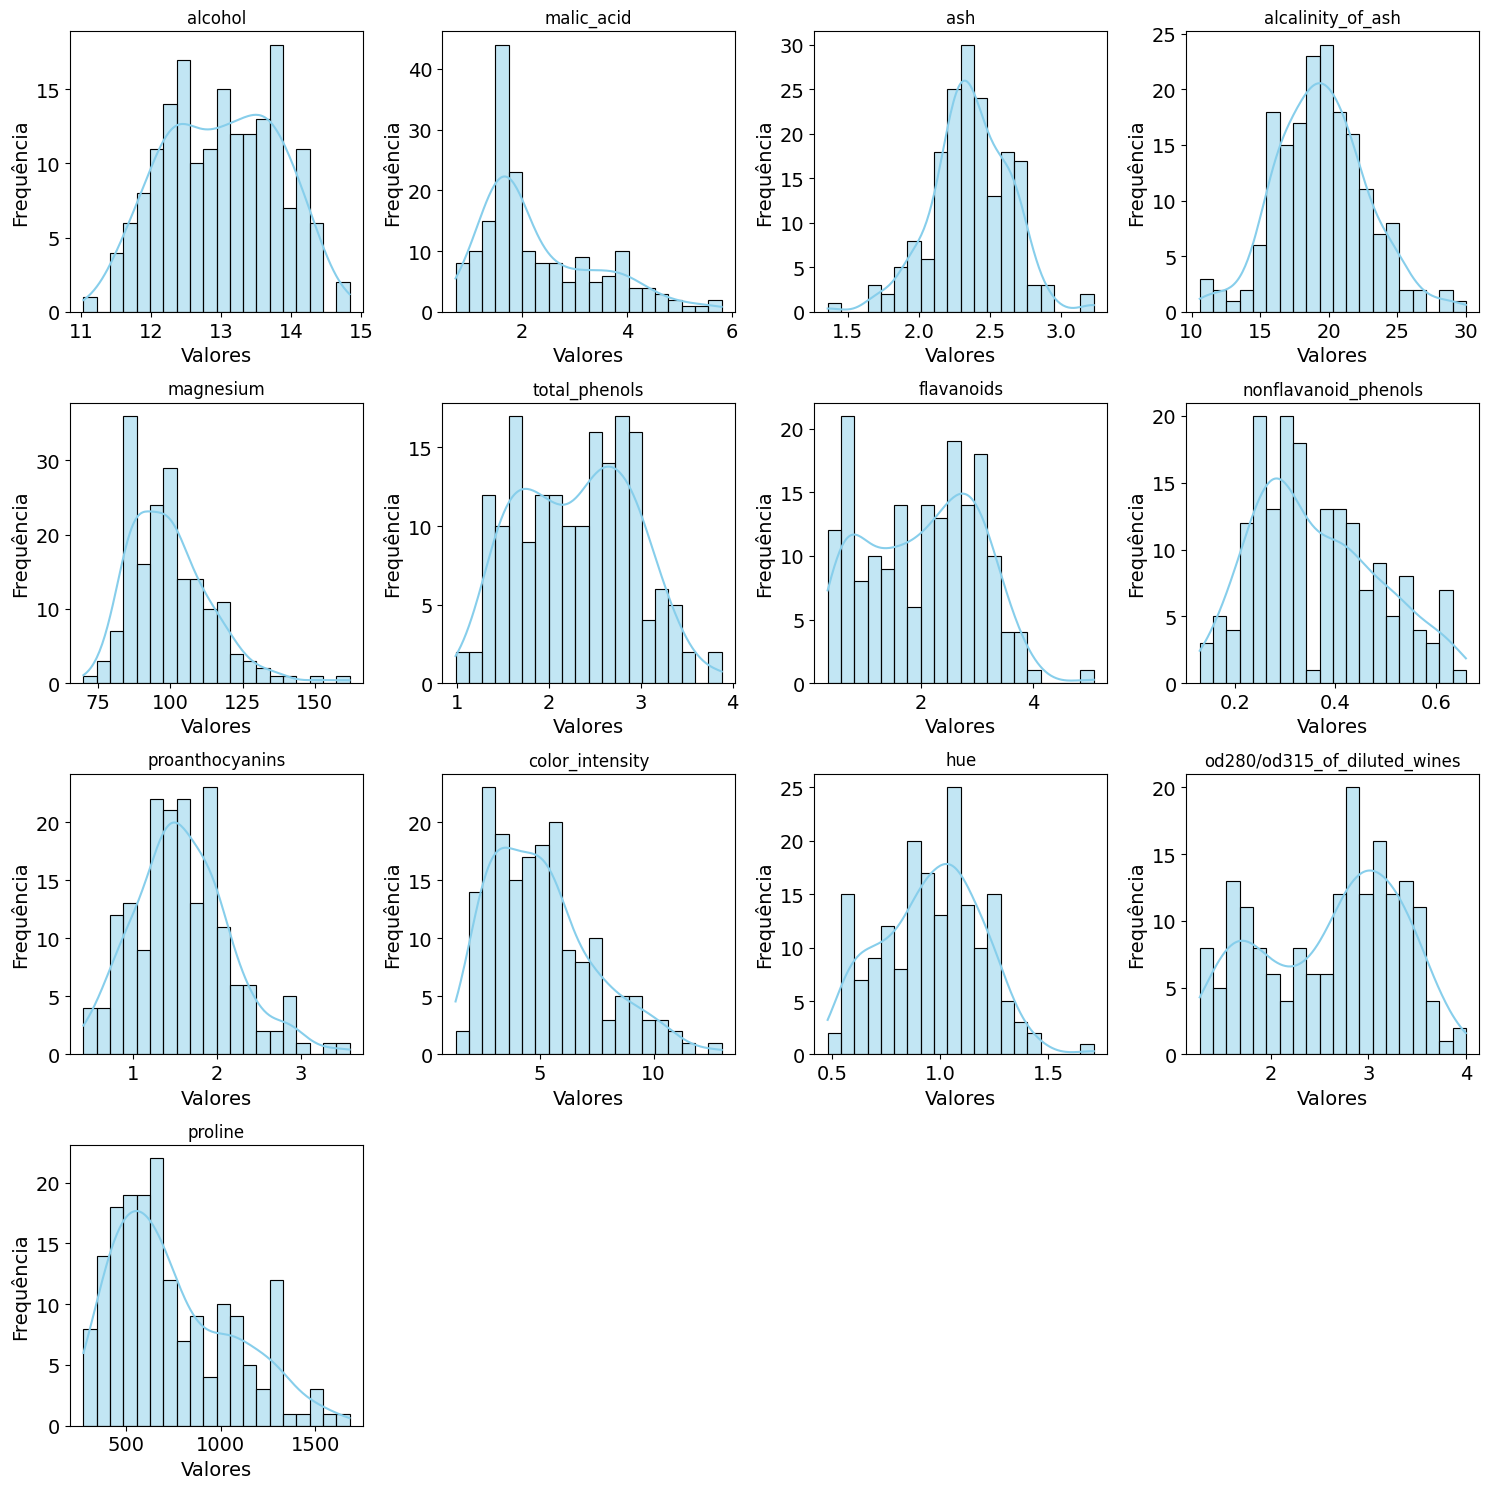

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(data=df, x=col, bins=20, kde=True,
                 color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='both', labelsize=14)  
    ax.set_xlabel('Valores', fontsize=14)
    ax.set_ylabel('Frequência', fontsize=14)
    
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

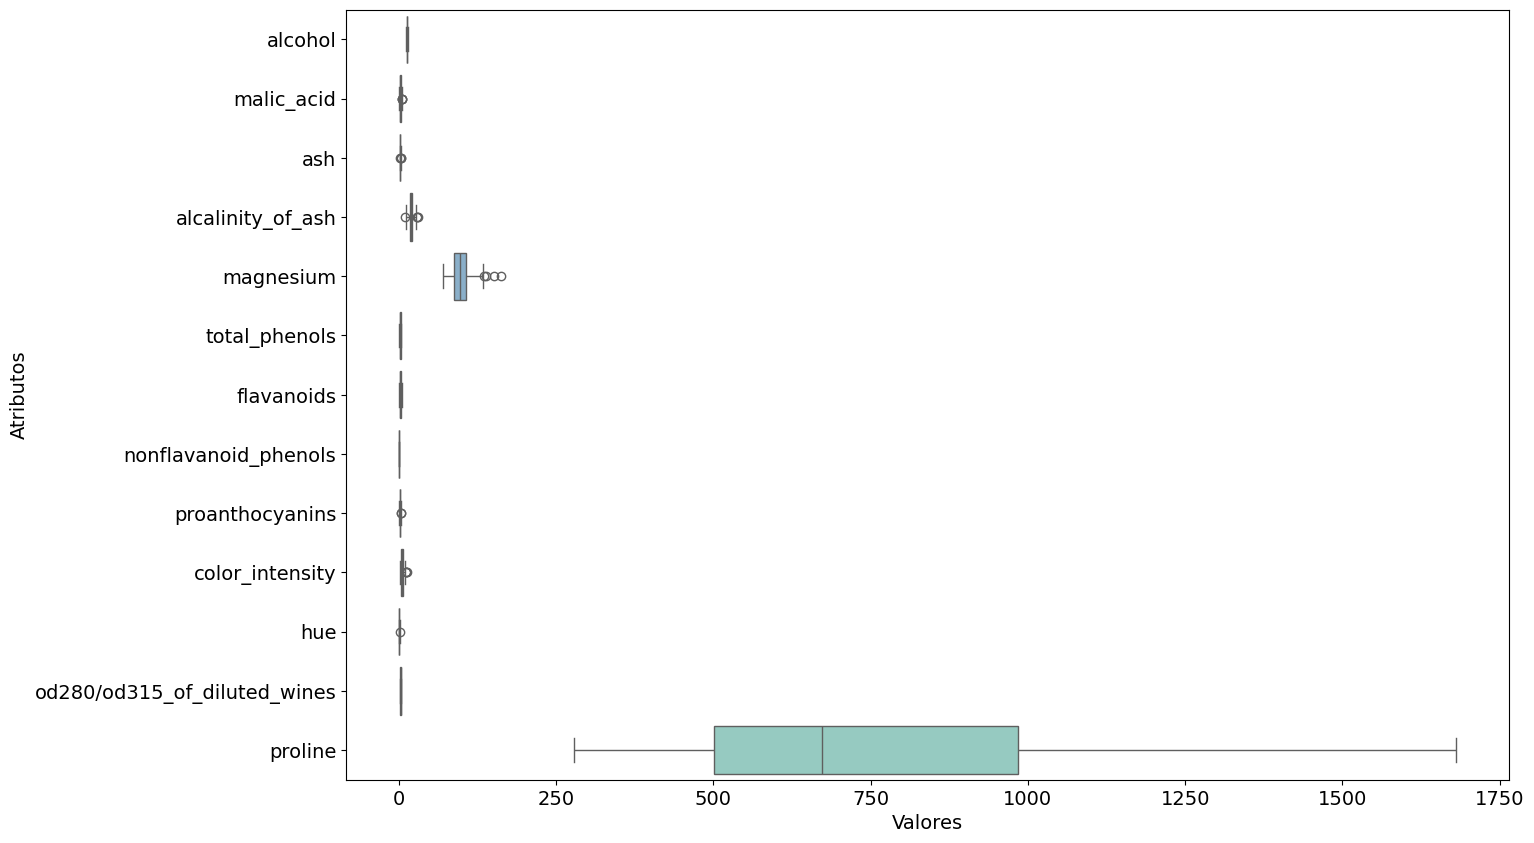

In [11]:
# Definir tamanho da figura
plt.figure(figsize=(15, 10))

# Criar box plot
sns.boxplot(data=df, orient='h', palette='Set3')
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Atributos', fontsize=14)
plt.tick_params(axis='both', labelsize=14)  

plt.show()

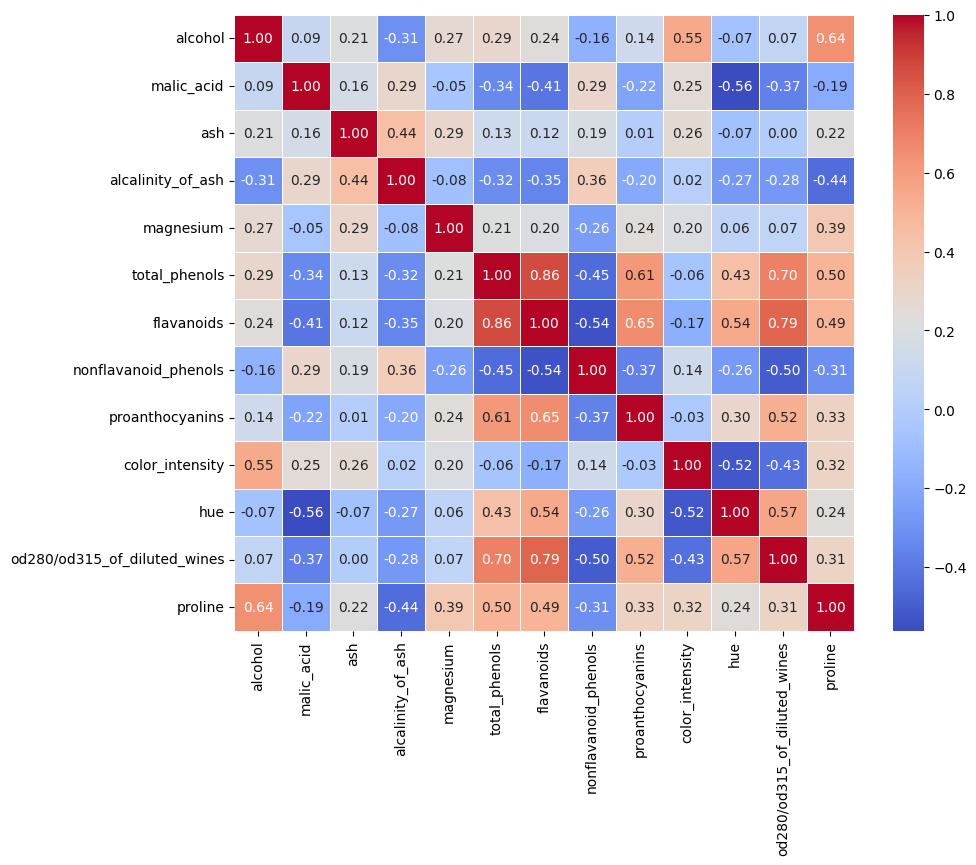

In [12]:
# Calcular a matriz de correlação
corr = df.corr()

# Configurar a figura do matplotlib
plt.figure(figsize=(10, 8))

# Desenhar o mapa de calor com a máscara e a proporção de aspecto correta
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.show()

- Pode-se constatar a alta variância de proline prejudicando a interpretação das outras features
- O heatmap de correlação mostrou correlações interessantes tanto positivas quanto negativas, com a feature flavanoids e total_phenols(0.86) tem a maior correlação da base seguido por flavanoids e od280/od315_of_diluted_wines(0.79)
- Feature flavanoids tem correlações interessantes com diversas outras. O que pode ser prejudicial ao utilizar uma modelo, tendo como consequencia o aumento de complexidade sem aumentar a variância das informações

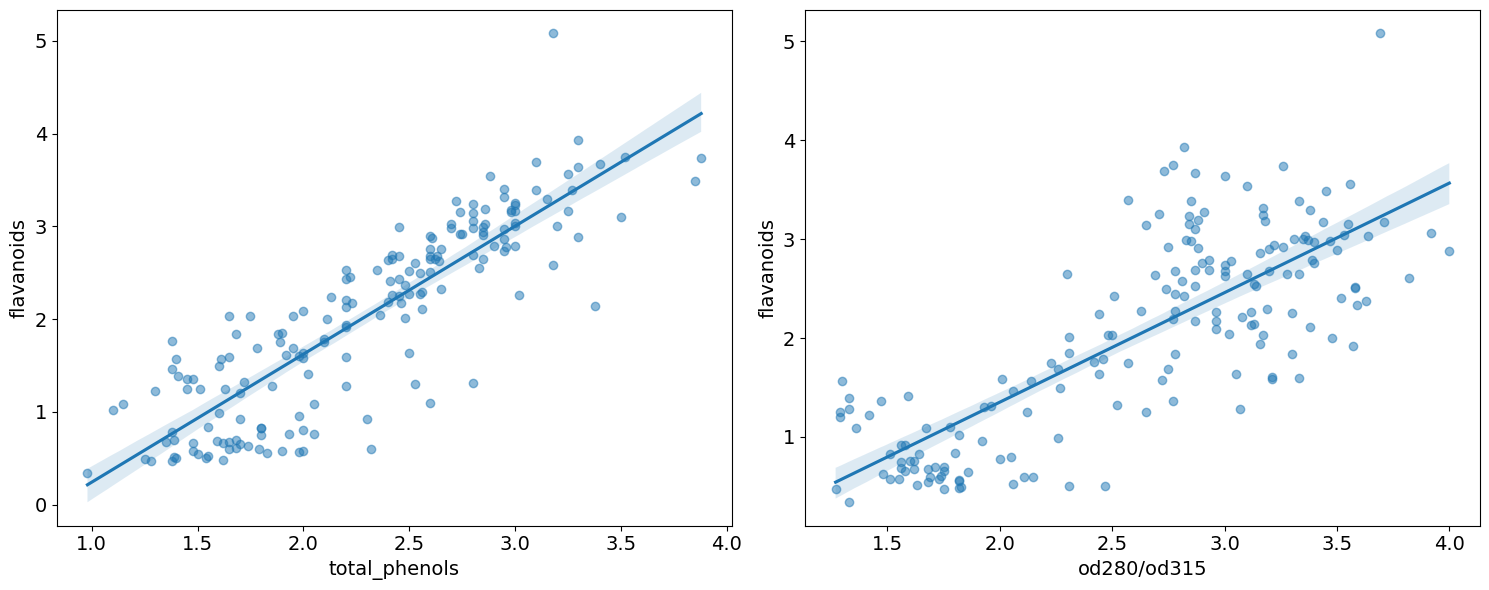

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.regplot(x='total_phenols', y='flavanoids', data=df, scatter_kws={'alpha':0.5}, ax=axes[0])
sns.regplot(x='od280/od315_of_diluted_wines', y='flavanoids', data=df, scatter_kws={'alpha':0.5}, ax=axes[1])
axes[0].tick_params(axis='both', labelsize=14)  
axes[1].tick_params(axis='both', labelsize=14) 

axes[0].set_ylabel('flavanoids', fontsize=14)
axes[0].set_xlabel('total_phenols', fontsize=14)

axes[1].set_ylabel('flavanoids', fontsize=14)
axes[1].set_xlabel('od280/od315', fontsize=14)



plt.tight_layout()  
plt.show()

### 2 - Pré-processamento

- A presença de variações amplas nos dados pode impactar negativamente o desempenho dos modelos, tanto os supervisionados, quanto os não supervisionados, como o K-Means. Isso ocorre porque atributos com maior variação ganham maior peso no ajuste dos modelos.
- Para contornar isso geralmente utiliza-se técnicas de normalização ou padronização dos dados. Então vamos padronizar as variáveis, ajustando-as para uma escola comum, com média zero e desvio padrão de um.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


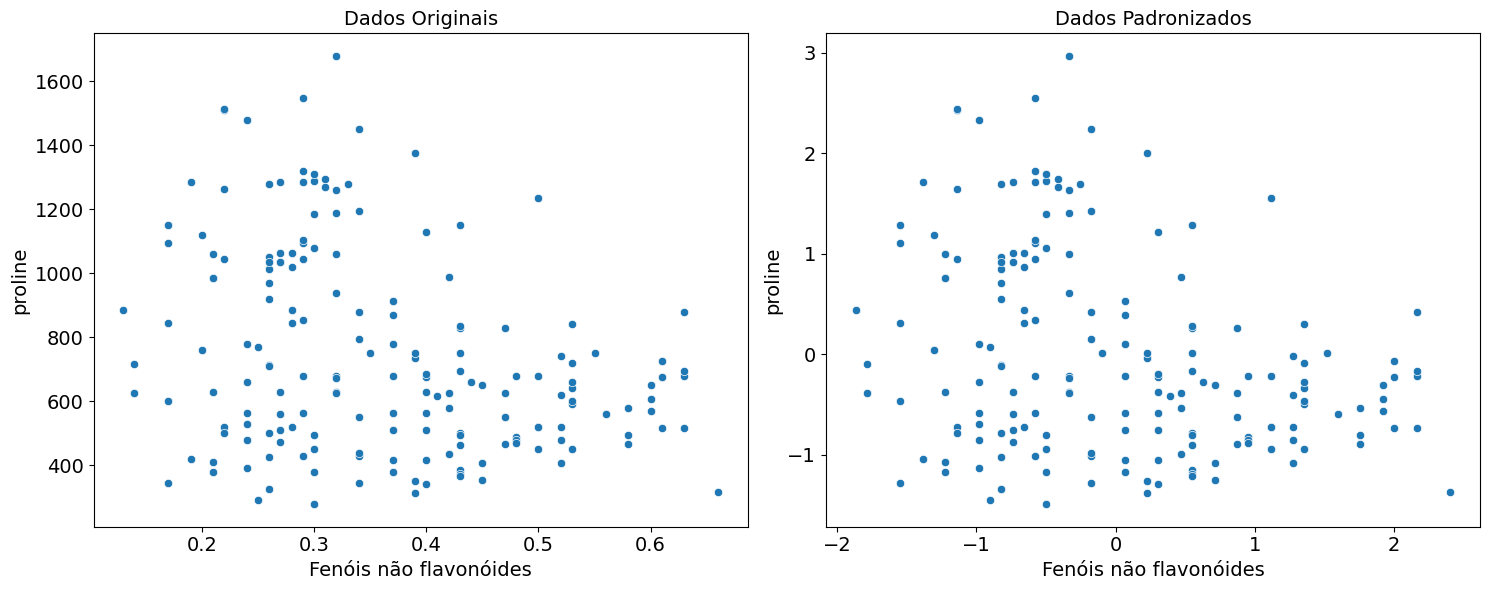

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=df, x='nonflavanoid_phenols', y='proline', ax=axes[0])
axes[0].set_title('Dados Originais', fontsize=14)
axes[0].set_xlabel('Fenóis não flavonóides', fontsize=14)
axes[0].set_ylabel('proline', fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)  
# axes[0].set_xlim(-1000,1000)

sns.scatterplot(data=df_scaled, x='nonflavanoid_phenols', y='proline', ax=axes[1])
axes[1].set_title('Dados Padronizados', fontsize=14)
axes[1].set_xlabel('Fenóis não flavonóides', fontsize=14)
axes[1].set_ylabel('proline', fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)  

plt.tight_layout()
plt.show()